# **Performing exploratory data analysis as well as data visualization to understand how different factors influence the demand of the listing properties on Airbnb and ultimately using machine learning techniques to make predictions on the availability of the listing properties.**


**Objective of this analysis is to answer below questions**

Where are most of the properties listed and where is the busiest areas?
What type of rooms are most popular?
How are different area/neighbourhood affect the listing property price and demands?
What are the most important factors when customer choose an airbnb property?
*   Price
*   Location
*   Room Type
*   Customer Review

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

from wordcloud import WordCloud

%matplotlib inline

# set default plot size
plt.rcParams["figure.figsize"] = (15,8)

# import plotly.express as px
# import plotly.graph_objects as go

In [2]:
ny = pd.read_csv("AB_NYC_2019.csv")

In [3]:
ny.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [5]:
nyc=ny.copy()

In [6]:
nyc.drop(['id','name','host_id','host_name'],axis=1,inplace = True)

In [7]:
nyc.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


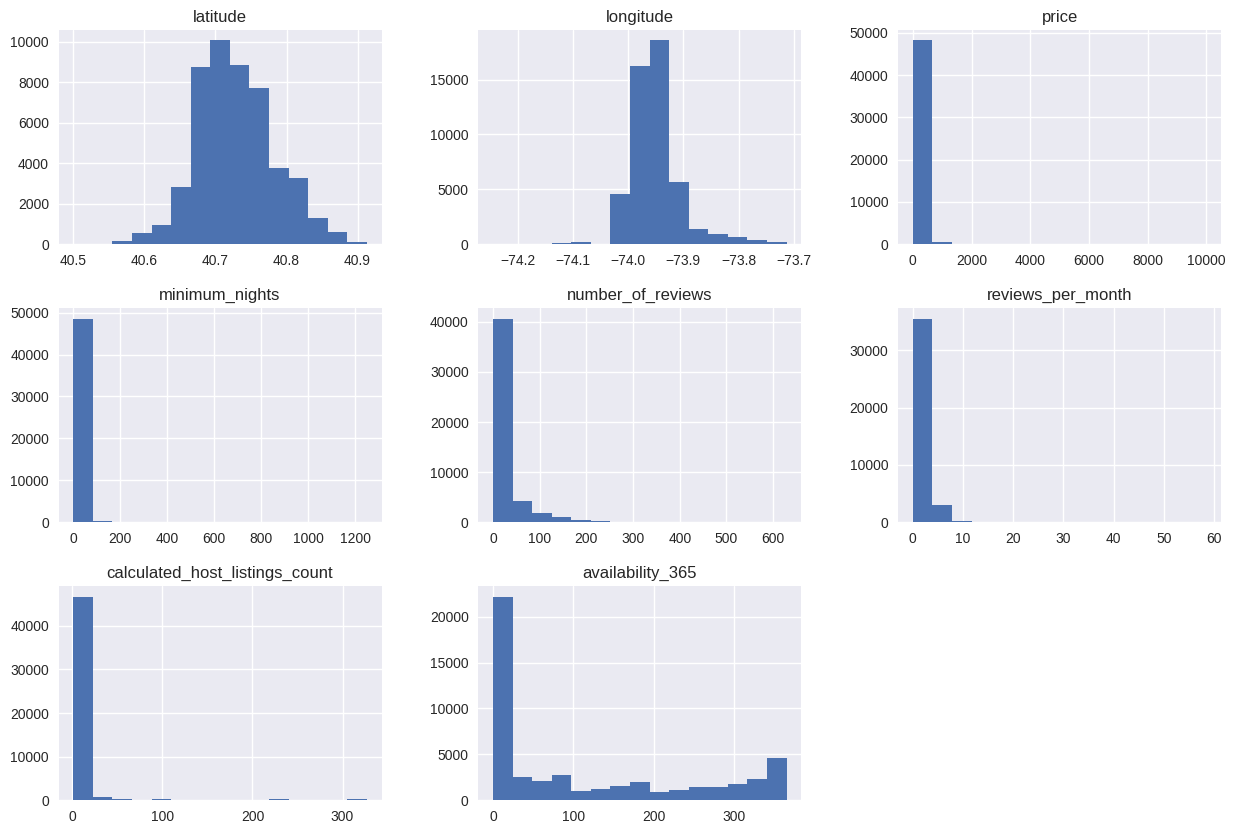

In [8]:
nyc.hist(bins=15, figsize=(15,10));

Looking at the histograms, we can notice that some important variables like **price** and **minimum_nights** our poorly distributed. Also, **number_of_reviews** and **calculated_host_listings_count** are highly skewed, we transfer them into categorical variable. In order to better identify these problems, let's see more statistics about the dataset using the describe method.

**DATA CLEANING**

Removing the outliers for price and minimum_nights column. Calculating z score for both column and remove all records that have a z score greater than 3.

In [9]:
nyc.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
nyc[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We can easily see that some values do not make sense.
Price column --> average price is 175, however, maximum price is 10000.

minimum_nights column --> maximum value is 1,250! How can someone expect to have their place booked if the visitor has to stay at least three and a half years? It makes absolutely no sense!

these values distort reality

**Removing Outliers**

let's see how many and what percentages of prices are equal to
0 and over 500.00

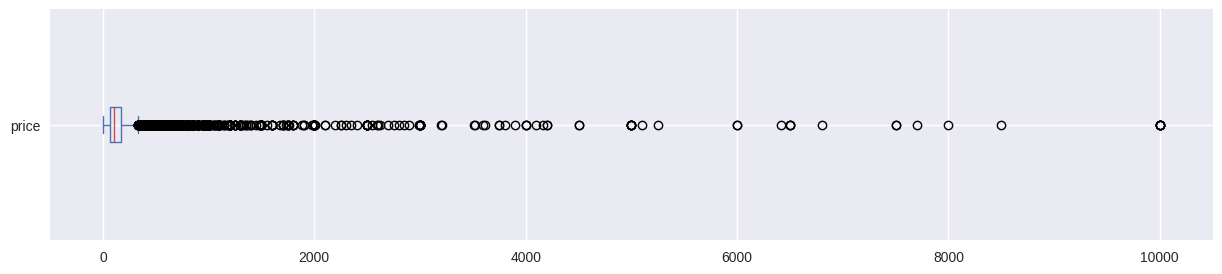

Values over $500.00: 
1044
2.1352%


Values equal to $0: 
11
0.0225%


In [11]:
# Displaying the box plot
nyc['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to
500.00
print('Values over $500.00: ')
print(len(nyc[nyc['price'] > 500]))
print('{:.4f}%'.format((len(nyc[nyc['price'] > 500]) / nyc.shape[0]) * 100))
print('\n')
print('Values equal to $0: ')
print(len(nyc[nyc['price'] == 0]))
print('{:.4f}%'.format((len(nyc[nyc['price'] == 0]) / nyc.shape[0]) * 100))

Percentages of minimum nights that are over 30 nights.

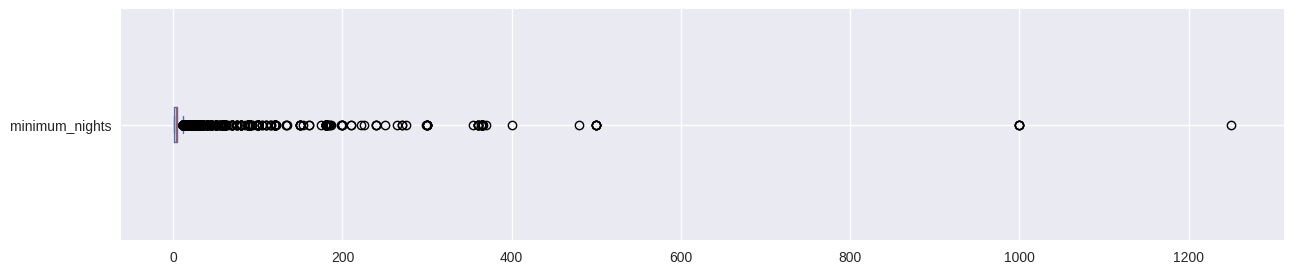

Values over 30 nights: 
747
1.5278%


In [12]:
# Displaying the box plot
nyc['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of rooms with the minimum nights value over 30
print('Values over 30 nights: ')
print(len(nyc[nyc['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(nyc[nyc['minimum_nights'] > 30]) / nyc.shape[0]) * 100))

Only 2.13% of the price column is above $500.00 and only 1.52% of the values in the minimum_nights column is above 30. We have 11 elements with price zero as well.

Taking into consideration, as we said earlier, that 75% of these columns' values are below $175.00 and 5 nights, respectively, it is reasonable to lose roughly 3.8% of the data in order to make it more realistic. Therefore, we'll create a new dataframe, ny_clean, that contains only the rows in which the price is more than 500, and the minimum nights is no more than 30.

Also, probably some columns fulfill both these requirements, which means that we are losing even less than 3.8% of the dataset.


In [13]:
# Selecting the rows that fulfil the established requirements
ny_clean = nyc[(nyc['price'] <= 500) & (nyc['price'] > 0) & (nyc['minimum_nights'] <= 30)].copy()

In [14]:
# Droping the columns
ny_clean.drop(['reviews_per_month', 'last_review'], axis=1, inplace=True)
ny_clean.reset_index(drop=True, inplace=True)

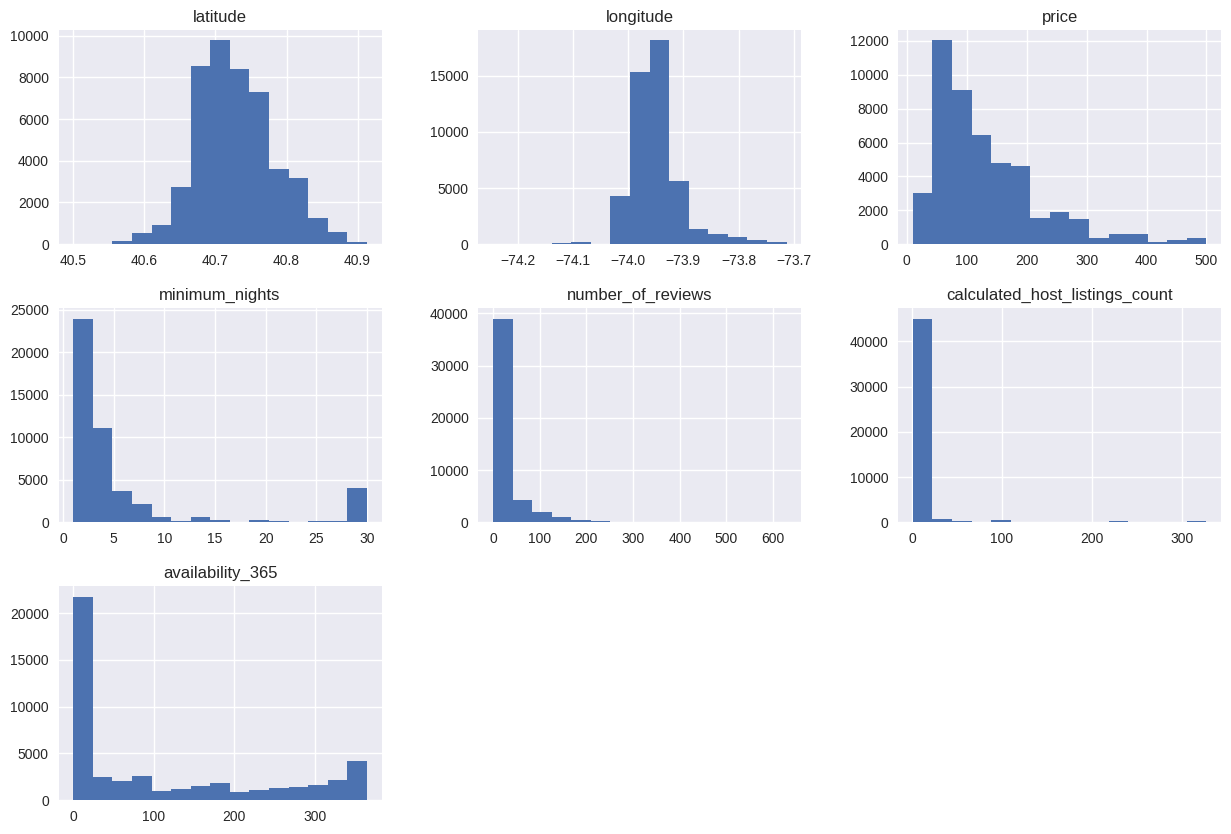

In [15]:
# Plotting the histograms againd
ny_clean.hist(bins=15, figsize=(15,10));

the most common prices are still below U$100.00, but the distribution is much more realistic now.

**Correlations**

In [16]:
corr = ny_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.054697,-0.048772,0.162603,0.093187
minimum_nights,0.054697,1.000000,-0.148999,0.332898,0.242084
number_of_reviews,-0.048772,-0.148999,1.000000,-0.072440,0.182621
calculated_host_listings_count,0.162603,0.332898,-0.072440,1.000000,0.229478
availability_365,0.093187,0.242084,0.182621,0.229478,1.000000


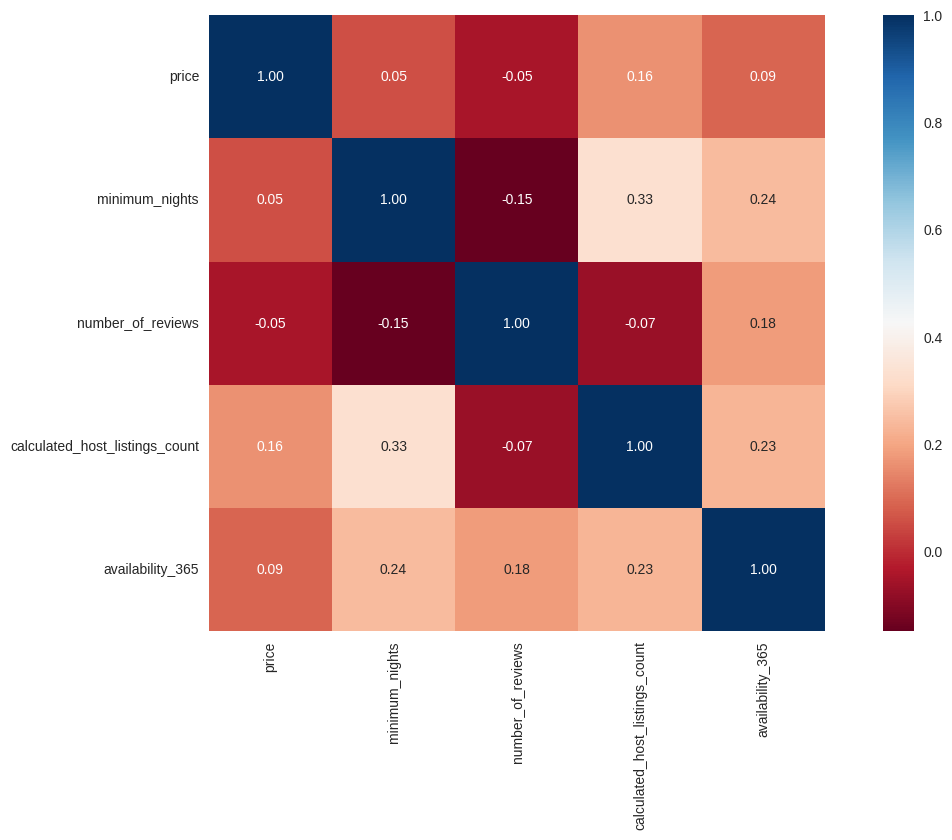

In [17]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

<Axes: >

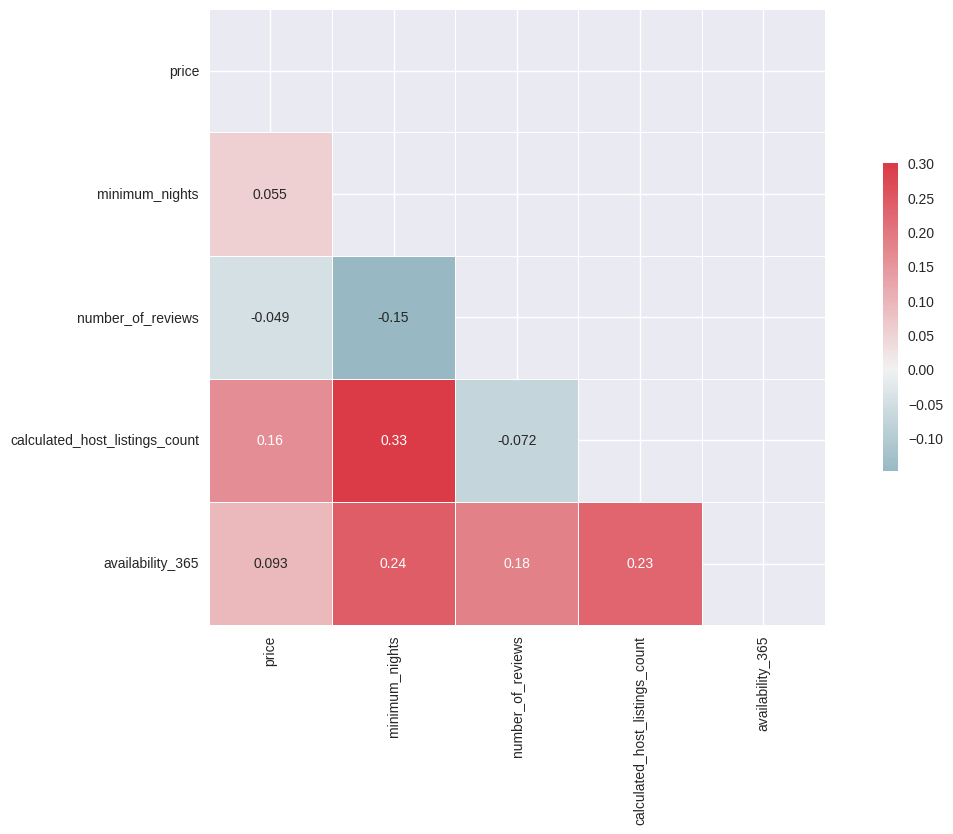

In [18]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)

the variables do not seem to be significantly correlated to one another.

**Plotting all the listing properties** on the map to see where the most properties located and how their price differs.

For this task, I am using **plotly** and **density_mapbox** by passing latitude, longitude and price.

From the plot, I can see that as expected, most properties are in Manhattan, on the south side of the Central Park, and also on the north side of Brooklyn around Willamsburg Bridge. These location offers the most convenient transportation for the tourists in that they are either in Manhattan or near it. By looking at the price, these locations also have the highest prices.

In [19]:
import plotly.express as px

lat = np.mean(ny_clean['latitude'])
lon = np.mean(ny_clean['longitude'])


fig = px.density_mapbox(ny_clean, lat='latitude', lon='longitude', z='price', radius=2,
                        center=dict(lat = lat, lon = lon), zoom=10,
                        mapbox_style="carto-positron")
fig.show()

To further explore how location affect listing properties, the following code calculate the mean and median for **price, number_of_reviews and availability_365**.

We can see that Manhattan has the most listing and the highest median price, followed by Brooklyn. However, Brooklyn have a higher demand than Manhattan as the availability_365 mean and median is the lowest.

In [20]:
result = ny_clean.groupby('neighbourhood_group')[['price', 'number_of_reviews', 'availability_365']].agg(['count', 'mean', 'median'])

print(result)

                     price                    number_of_reviews             \
                     count        mean median             count       mean   
neighbourhood_group                                                          
Bronx                 1070   81.976636   65.0              1070  26.412150   
Brooklyn             19623  112.698109   90.0             19623  24.486266   
Manhattan            20484  163.298037  145.0             20484  21.577133   
Queens                5585   93.026321   75.0              5585  27.956670   
Staten Island          363   91.432507   75.0               363  31.787879   

                           availability_365                     
                    median            count        mean median  
neighbourhood_group                                             
Bronx                  9.0             1070  165.566355  147.5  
Brooklyn               6.0            19623   98.804668   26.0  
Manhattan              4.0            20484  107.4

Then we will use boxplot to visualize the median by different categorical variables to explore how the price and availabilty differ between groups

Boxplot of neighbourhood group and room type with price

1.   Entire home/apt have the highest median price over other room types, followed by Private room and shared room, as expected
2.   Manhattan entire home/apt have the highest median price, followed by Brooklyn

In [21]:
ny_clean.columns


Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

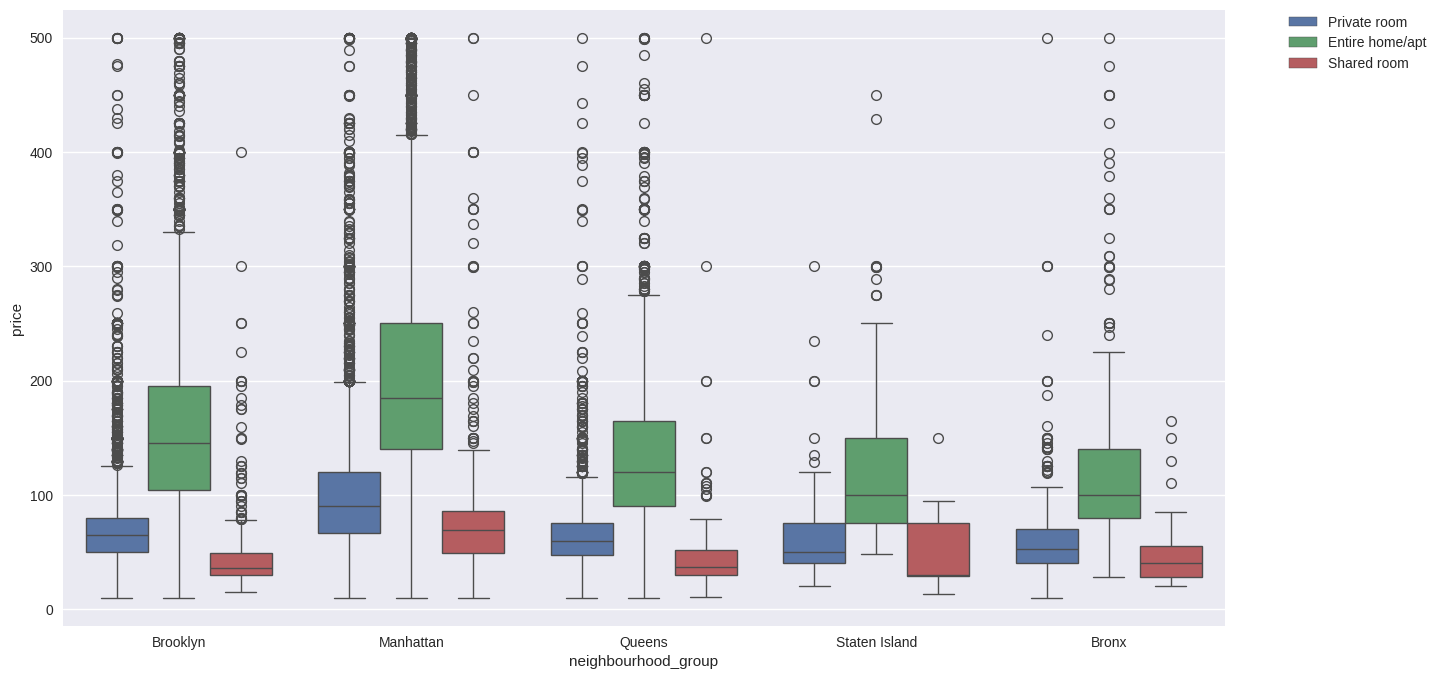

In [22]:
# boxplot of neighbourhood group and price
# entire home/apt have the highest median price over other room types
# manhattan entire home/apt have the highest median price
sns.boxplot(x="neighbourhood_group", y="price",hue = "room_type",data=ny_clean)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

let's see which kind of room is **more common in the New York City** Airbnb.

room_type
Entire home/apt    24029
Private room       21963
Shared room         1133
Name: count, dtype: int64


room_type
Entire home/apt    50.99
Private room       46.61
Shared room         2.40
Name: proportion, dtype: float64




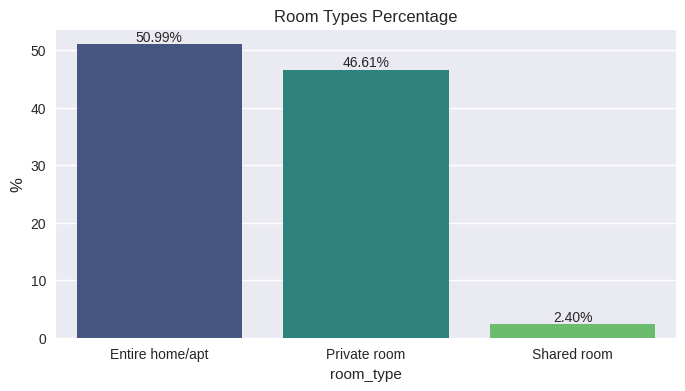

In [23]:
# Calculating the number of rooms for each room type
room_type = ny_clean['room_type'].value_counts().sort_values(ascending=False)

# Calculating the percentage of rooms for each room type
room_type_pct = round(ny_clean['room_type'].value_counts(normalize=True) * 100, 2)

# Displaying the results
print(room_type)
print('\n')
print(room_type_pct)
print('\n')

# Setting up the plot size
plt.figure(figsize=(8, 4))

# Plotting the percentage of rooms for each room type with different colors
ax = sns.barplot(x=room_type_pct.index, y=room_type_pct.values, palette="viridis")
ax.set_title('Room Types Percentage')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylabel('%', fontsize=12)

# Adding percentage labels on the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%')

# Hide the spines
for key, spine in ax.spines.items():
    spine.set_visible(False)

# Show the plot
plt.show()

room_type
Entire home/apt    180.06
Private room        81.87
Shared room         63.78
Name: price, dtype: float64




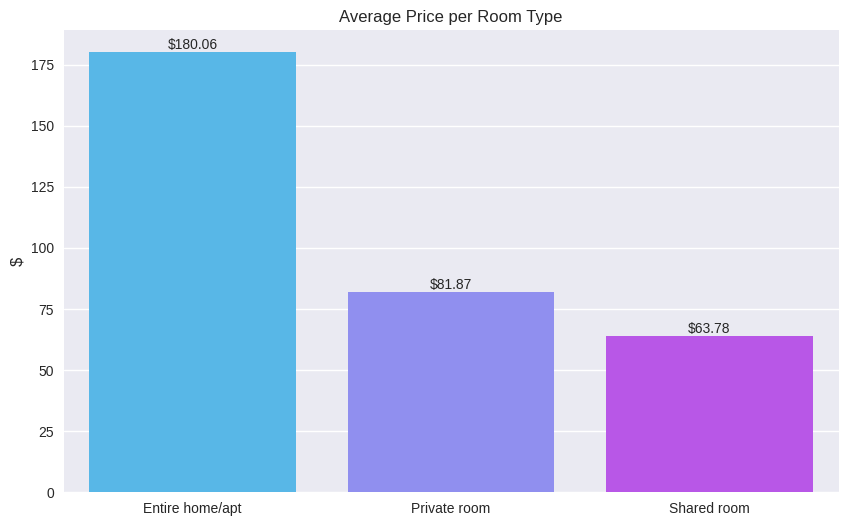

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the average price per room type
type_price = round(ny_clean.groupby('room_type').price.mean(), 2).sort_values(ascending=False)

# Displaying the results
print(type_price)
print('\n')

# Setting up the plot size
plt.figure(figsize=(10, 6))

# Plotting the average price per room type with different colors
ax = sns.barplot(x=type_price.index, y=type_price.values, palette="cool")
ax.set_title('Average Price per Room Type')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')

# Adding price labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f')

# Hide the spines
for key, spine in ax.spines.items():
    spine.set_visible(False)

# Show the plot
plt.show()


**MODEL BUILDING**

 To predict the availability of a listing property based on its location, price and other metrics, I'll try different regression to fit the data and find out which model best fit the data and make the most accurate prediction.

In [25]:
ab_nyc_model = ny_clean.drop(['latitude','longitude'],axis = 1)
ab_nyc_model.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [26]:
ab_nyc_model=ab_nyc_model.drop(['neighbourhood'], axis=1)

In [27]:
ab_nyc_model.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,6,365
1,Manhattan,Entire home/apt,225,1,45,2,355
2,Manhattan,Private room,150,3,0,1,365
3,Brooklyn,Entire home/apt,89,1,270,1,194
4,Manhattan,Entire home/apt,80,10,9,1,0


transferring the **categorical variables into binary** using one hot encoding.

In [28]:
# List of categorical variables
categorical_var = ['neighbourhood_group', 'room_type']


for variable in categorical_var:

    # Create dummy variables for the given columns
    dummies = pd.get_dummies(ab_nyc_model[variable], prefix=variable)

    # Update data and drop original columns
    ab_nyc_model = pd.concat([ab_nyc_model, dummies], axis=1)
    ab_nyc_model.drop([variable], axis=1, inplace=True)

ab_nyc_model.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,6,365,False,True,False,False,False,False,True,False
1,225,1,45,2,355,False,False,True,False,False,True,False,False
2,150,3,0,1,365,False,False,True,False,False,False,True,False
3,89,1,270,1,194,False,True,False,False,False,True,False,False
4,80,10,9,1,0,False,False,True,False,False,True,False,False


# **Multiple Linear Regression**

we split the dataset into training and testing dataset with 70/30 split. We'll use the regression module in both statsmodels and sklearn

In [29]:
x = ab_nyc_model.drop(['availability_365'], axis=1)
y = ab_nyc_model['availability_365'].astype(float)

# split train and test dataset
train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.3, random_state=42)

print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

(32987, 12)
(32987,)
(14138, 12)
(14138,)


# **Multiple Linear Regression using Statsmodels**

In [30]:
linear_model_sm = sm.OLS(train_y,sm.tools.add_constant(train_x).astype(float))
results_sm = linear_model_sm.fit()
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:       availability_365   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     760.8
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        22:30:37   Log-Likelihood:            -2.0400e+05
No. Observations:               32987   AIC:                         4.080e+05
Df Residuals:                   32976   BIC:                         4.081e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

After fitting the model, we can see that the R square is 0.187, which is not very high, given that all of the variables are significant with a p value less than 0.05.

Looking at the coefficients, we can see that both price and number_of_review is positive, which means the higher both these two are, the least demand for the listing property will be. Manhattan and Brooklyn have a negative coefficient, which means properties in these two locations have a higher demand. Additionally, entire room,/apt is the most popular room type.



# **Multiple Linear Regression using Sklearn**

In [31]:
linear_model_sk = LinearRegression()
linear_model_sk.fit(train_x, train_y)
linear_model_sk.score(test_x, test_y)

0.18834844183367683

result is similar with a low model score of 0.187. this suggest that maybe the data doesn't fit a linear relationship because the prediction have a high variance from the actual value. We may need to try to use other non-linear regression techniques.

In [32]:
pred_y = linear_model_sk.predict(test_x)
df = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})
df.head(30)

,Actual,Predicted
44407,124.0,160.866185
46597,338.0,160.955773
28073,348.0,125.700303
43634,46.0,85.880510
9266,0.0,103.467319
10007,0.0,62.210209
34000,0.0,109.985408
46789,151.0,113.615777
42245,61.0,79.821433
24210,0.0,107.273475


# **Random Forest Regressor**

It is a popular machine learning techniques that can not only be used in classification problems, but also be used in regression problems. To make random forest uniques is that it can also be used to fit non-linear relationship.

Initial Model: We first start an instance of the model with a randomly chosen parameters. These prameters will later be tuned to yield optimized results.

In [33]:
# random forest regressor for non-linear regression

rf_regressor = RandomForestRegressor(n_estimators=100,random_state=0)
rf_regressor.fit(train_x,train_y)

RandomForestRegressor(random_state=0)

In [34]:
rf_regressor.score(train_x,train_y)

0.818802604009173

The random forest has a score of 0.81, which is significantly higher than linear regression.

To see which **feature have the most influence**, the bar plot below plots each features from the most significant to the least.



<Axes: >

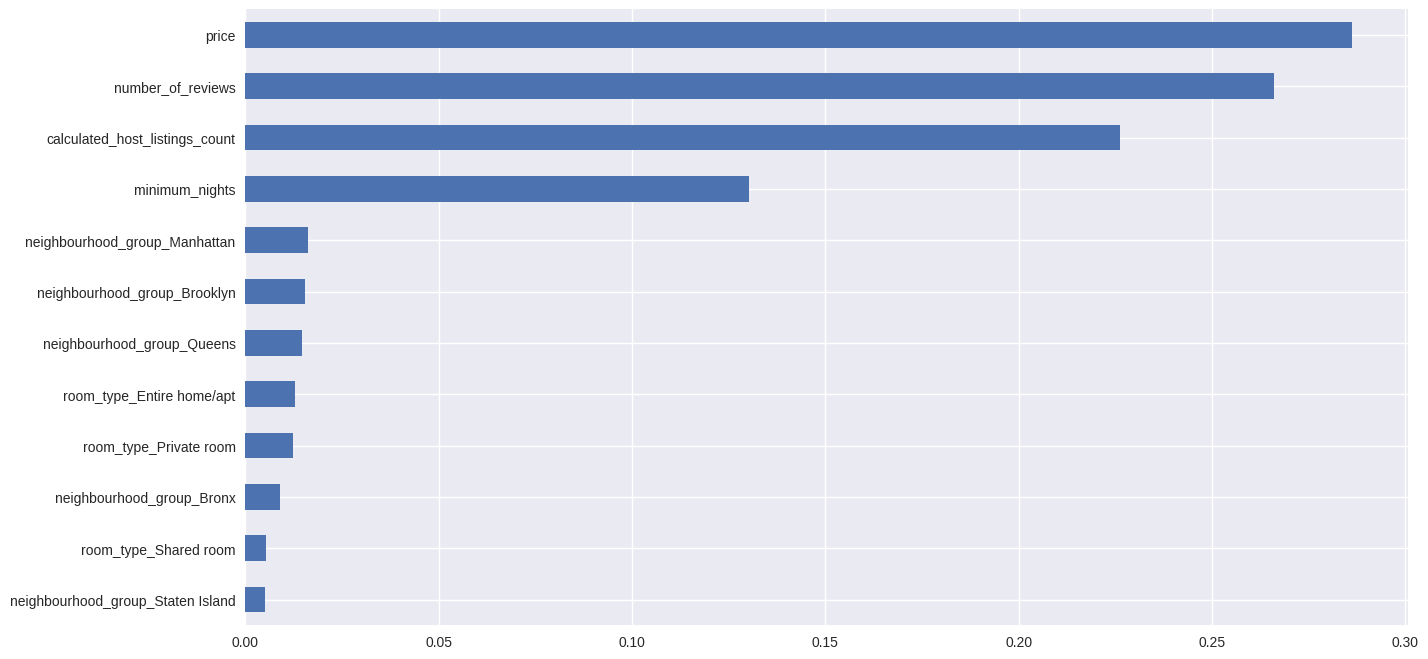

In [35]:
feature_importance = pd.Series(rf_regressor.feature_importances_,index=x.columns)
feature_importance = feature_importance.sort_values()
feature_importance.plot(kind='barh')

We can see that the **price** and **number_of_review** have the most influence on availability of the listing.

**Parameter Tuning**
We want to tune the parameter for the random forest regressor to optimize the results.

30  trees
0.8106930594445938

50  trees
0.8151631427732169

100  trees
0.8187185238081989

200  trees
0.8206602016043865

500  trees
0.8217048238744034

1000  trees
0.8220064992449019

2000  trees
0.8221863380805949



<Axes: >

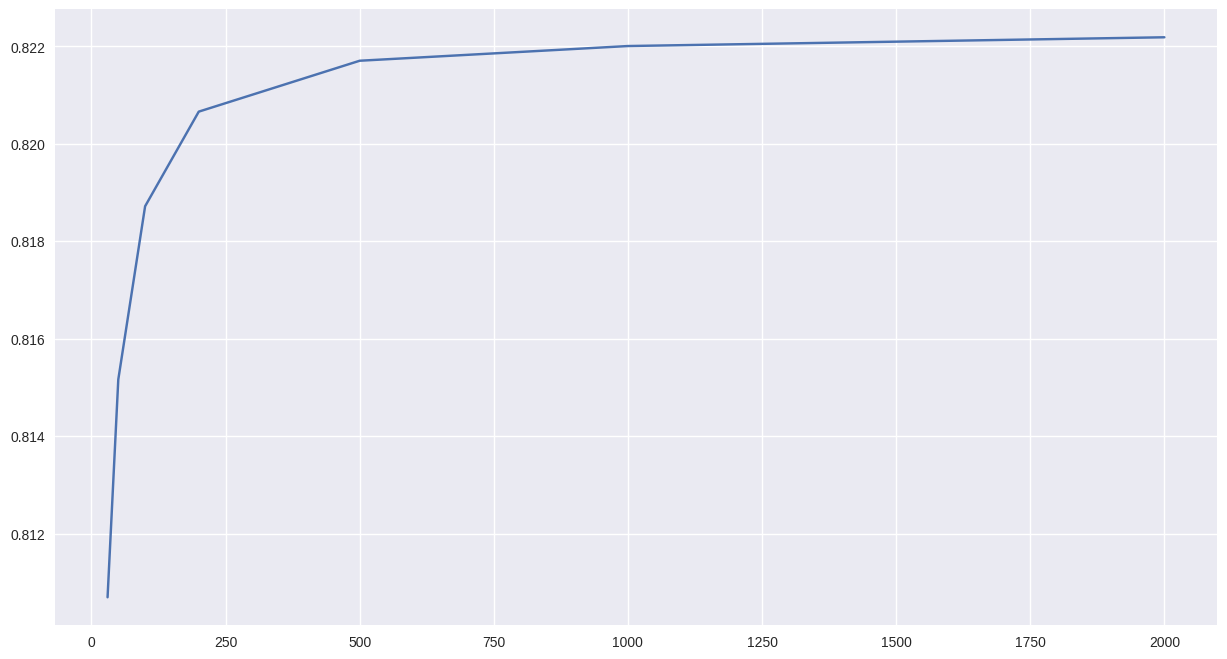

In [36]:
results_rf = []
n_estimator_options = [30,50,100,200,500,1000,2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees,oob_score=True,n_jobs=-1,random_state=42)
    model.fit(train_x,train_y)
    print(trees," trees")
    score = model.score(train_x,train_y)
    print(score)
    results_rf.append(score)
    print("")

pd.Series(results_rf,n_estimator_options).plot()


**n_estimator_options tunning**
We will choose 200 trees based on the plot because after 200 trees, the model score increase is flattened.

**max_features_options tunning** -->
set **auto**


auto  option
0.8217048238744034

None  option
0.8217048238744034

sqrt  option
0.8229768577619883

log2  option
0.8229768577619883

0.9  option
0.8221686617241533

0.2  option
0.8229672792995288



<Axes: >

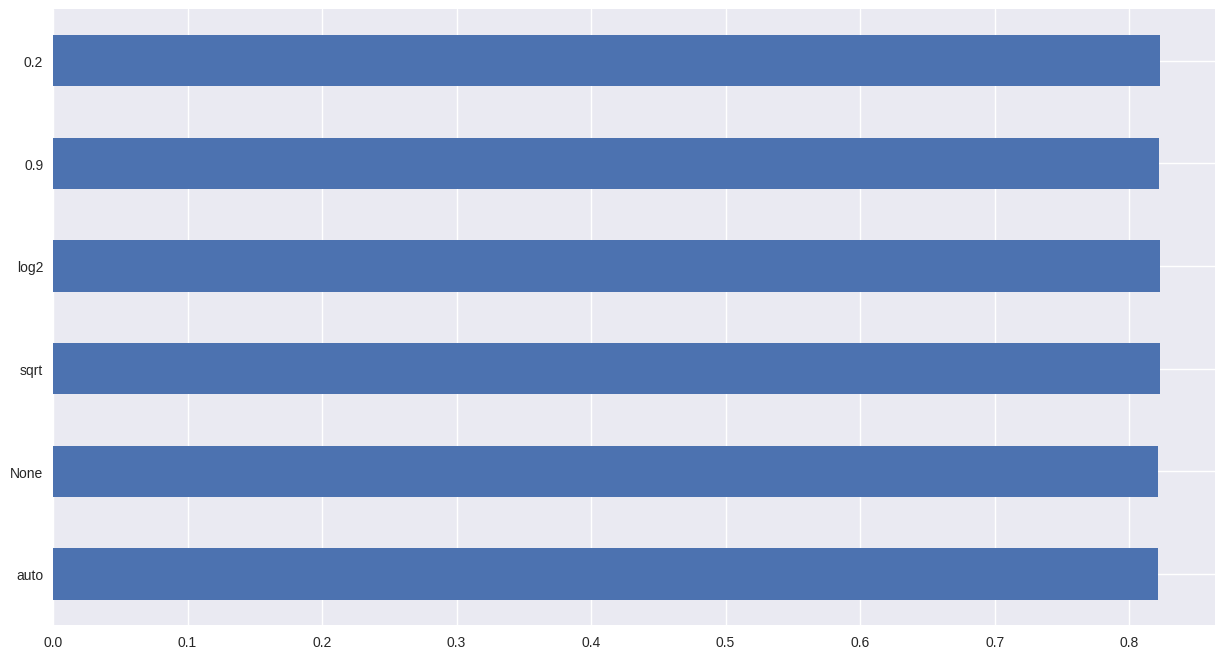

In [38]:
results_rf = []
max_features_options = ['auto',None,'sqrt','log2',0.9,0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=500,oob_score=True,n_jobs=-1,
                                  random_state=42,max_features=max_features)
    model.fit(train_x,train_y)
    print(max_features," option")
    score = model.score(train_x,train_y)
    print(score)
    results_rf.append(score)
    print("")

pd.Series(results_rf,max_features_options).plot(kind='barh')

**Final Model**
Based on the parameter tunning, we will use n_estimators=200 and max_features='auto' to fit the random forest regressor. The final model has a score of 0.82

In [39]:
rf_regressor = RandomForestRegressor(n_estimators=500,oob_score=True,n_jobs=-1,
                                  random_state=42,max_features='auto')
rf_regressor.fit(train_x,train_y)
rf_regressor.score(train_x,train_y)

0.8217048238744034

# **Model Prediction**

In [41]:
pred_y = rf_regressor.predict(test_x)
df = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})
df.head()

,Actual,Predicted
44407,124.0,125.504000
46597,338.0,115.878000
28073,348.0,144.432633
43634,46.0,218.146000
9266,0.0,11.972352


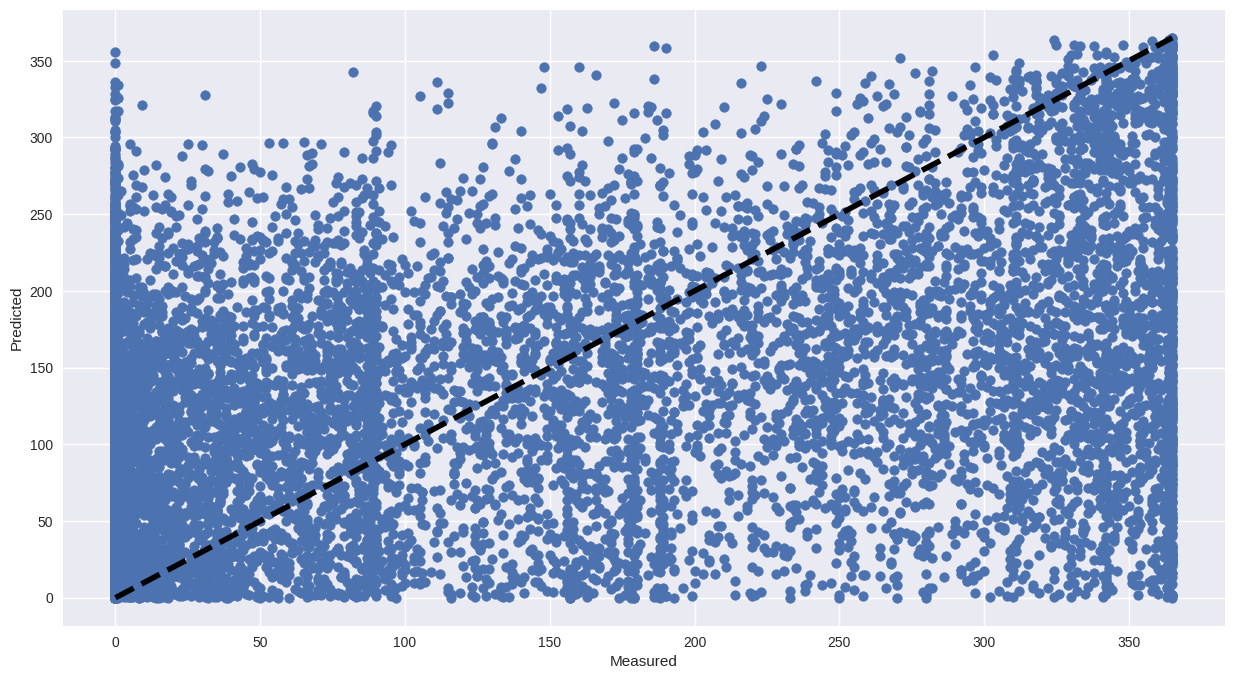

In [42]:
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()